## Import libraries

In [103]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, f1_score 
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

## Load Data

In [104]:
df_train = pd.read_csv('train_selected.csv')
df_train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [105]:
#df_test = pd.read_csv('test_selected.csv')
df_test = pd.read_csv('test_selected_ttf.csv')
df_test.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0


In [ ]:
'''
data_temp=[]
with open("PM_truth.txt") as fdata:
    while True:
        line=fdata.readline()
        if not line:
            break
        data_temp.append([float(i) for i in line.split()])
truth_ttf = np.array(data_temp) 
truth_ttf
'''

In [ ]:
'''
truth_label_bnc = []
for i in truth_ttf:
    if i > 30:
        truth_label_bnc.append(0)
    else:
        truth_label_bnc.append(1)
truth_label_bnc
'''

## Exploratory Data Analysis (EDA)

In [4]:
df_train.shape

(20631, 8)

Training Dataset comprises of 20631 observations and 8 characteristics. "id", "cycle", "s1", "s2", "s3" and "s4" are independent variables, and "ttf" and "label_bnc" are dependent variables.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   s1         20631 non-null  float64
 3   s2         20631 non-null  float64
 4   s3         20631 non-null  float64
 5   s4         20631 non-null  float64
 6   ttf        20631 non-null  int64  
 7   label_bnc  20631 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.3 MB


Data has only float and integer values and No variable column has null/missing values.

In [16]:
df_train.describe()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,1408.933782,553.367711,47.541168,521.413470,107.807862,0.150259
std,29.227633,68.880990,9.000605,0.885092,0.267087,0.737553,68.880990,0.357334
min,1.000000,1.000000,1382.250000,549.850000,46.850000,518.690000,0.000000,0.000000
25%,26.000000,52.000000,1402.360000,552.810000,47.350000,520.960000,51.000000,0.000000
50%,52.000000,104.000000,1408.040000,553.440000,47.510000,521.480000,103.000000,0.000000
75%,77.000000,156.000000,1414.555000,554.010000,47.700000,521.950000,155.000000,0.000000
max,100.000000,362.000000,1441.490000,556.060000,48.530000,523.380000,361.000000,1.000000


In [18]:
df_train['label_bnc'].value_counts()

0    17531
1     3100
Name: label_bnc, dtype: int64

In [22]:
cor_matrix = df_train.copy().drop(['ttf'], axis=1).corr()
cor_matrix.style.background_gradient(cmap='coolwarm')

,id,cycle,s1,s2,s3,s4,label_bnc
id,1.000000,0.078753,0.026116,-0.032073,0.024707,-0.031882,-0.014482
cycle,0.078753,1.000000,0.624577,-0.595914,0.634385,-0.611354,0.503679
s1,0.026116,0.624577,1.000000,-0.793130,0.830136,-0.815591,0.648406
s2,-0.032073,-0.595914,-0.793130,1.000000,-0.822805,0.812713,-0.625592
s3,0.024707,0.634385,0.830136,-0.822805,1.000000,-0.846884,0.665655
s4,-0.031882,-0.611354,-0.815591,0.812713,-0.846884,1.000000,-0.640174
label_bnc,-0.014482,0.503679,0.648406,-0.625592,0.665655,-0.640174,1.000000


## Feature Engineering

### Choose Features

In [106]:
X = df_train.iloc[:,:-2]
del X['id']
X.head()

,cycle,s1,s2,s3,s4
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19


In [107]:
y = df_train.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_bnc, dtype: int64

In [108]:
truth_X = df_test.iloc[:,:-2]
del truth_X["id"]
#del truth_X["cycle"]
truth_X.head()

,cycle,s1,s2,s3,s4
0,31,1398.91,554.42,47.23,521.79
1,49,1410.83,553.52,47.67,521.74
2,126,1418.89,552.59,47.88,520.83
3,106,1406.88,552.64,47.65,521.88
4,98,1419.36,553.29,47.46,521.00


In [109]:
truth_y = df_test.iloc[:,-1]
truth_y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_bnc, dtype: int64

### Normalization

In [110]:
all_data = pd.concat([X,truth_X])
scaler = StandardScaler()
normed = scaler.fit_transform(all_data.copy())
X = pd.DataFrame(data=normed, columns=X.columns)
X.head()

,cycle,s1,s2,s3,s4
0,-1.567848,-0.926932,1.122224,-0.267468,0.335219
1,-1.553319,-0.644682,0.433081,-0.192577,1.176020
2,-1.538791,-0.526893,1.009250,-1.016382,1.365878
3,-1.524262,-0.785807,1.223901,-1.540622,1.962575
4,-1.509733,-0.302426,0.715517,-0.978937,1.053968


In [111]:
truth_X = X.tail(100)
truth_X.head()

,cycle,s1,s2,s3,s4
20631,-1.131990,-1.114728,1.190009,-1.166165,0.511516
20632,-0.870476,0.209846,0.173240,0.481446,0.443710
20633,0.248225,1.105490,-0.877422,1.267806,-0.790368
20634,-0.042347,-0.229086,-0.820935,0.406554,0.633568
20635,-0.158575,1.157717,-0.086601,-0.304914,-0.559826


In [112]:
X = X.iloc[:-100]
X.head()

,cycle,s1,s2,s3,s4
0,-1.567848,-0.926932,1.122224,-0.267468,0.335219
1,-1.553319,-0.644682,0.433081,-0.192577,1.176020
2,-1.538791,-0.526893,1.009250,-1.016382,1.365878
3,-1.524262,-0.785807,1.223901,-1.540622,1.962575
4,-1.509733,-0.302426,0.715517,-0.978937,1.053968


## Modeling

### Constructor Of Models

In [53]:
classifiers = [
                ('RF', RandomForestClassifier()),
                ('LR', LogisticRegression()),
                ('LDA', LinearDiscriminantAnalysis()),
                ('KNN', KNeighborsClassifier()),
                ('DT', DecisionTreeClassifier()),
                ('NB', GaussianNB()),
               ]

### Cross Validation (K-Fold)

In [60]:
cv = KFold(n_splits = 5, shuffle = True)
scores = []
for  name, classifier in classifiers:
    score = cross_val_score(classifier, X, y, cv= cv, scoring="f1")
    scores.append([name,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['Model', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 

,Model,f1_score
2,LDA,0.816467
1,LR,0.816062
0,RF,0.811702
3,KNN,0.801761
5,NB,0.789084
4,DT,0.755152


### Model Tuning With KFold

random forest

In [61]:
estimators = [50, 100, 150, 200, 250, 300, 350]
scores = []
for count in estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= count), X, y, cv= cv, scoring="f1")
    scores.append([count,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['n_estimators', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 

,n_estimators,f1_score
3,200,0.814806
2,150,0.812038
6,350,0.811304
4,250,0.810475
5,300,0.810065
1,100,0.809370
0,50,0.808067


LogisticRegression

In [77]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for algo in algorithms:
    score = cross_val_score(LogisticRegression(solver= algo), X, y, cv= cv, scoring="f1")
    scores.append([algo,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['algorithms', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 

,algorithms,f1_score
0,newton-cg,0.816764
1,lbfgs,0.816665
3,sag,0.816595
4,saga,0.816339
2,liblinear,0.815289


LinearDiscriminantAnalysis

In [75]:
algorithms = ['svd','lsqr','eigen']
scores = []
for algo in algorithms:
    score = cross_val_score(LinearDiscriminantAnalysis(solver= algo), X, y, cv= cv, scoring="f1")
    scores.append([algo,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['algorithms', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 

,algorithms,f1_score
1,lsqr,0.816404
2,eigen,0.815829
0,svd,0.814947


KNeighborsClassifier

In [78]:
k_list = [1,2,3,4,5,6,7,8,9,10]
scores = []
for k in k_list:
    score = cross_val_score(KNeighborsClassifier(n_neighbors= k), X, y, cv= cv, scoring="f1")
    scores.append([k,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['k', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 

,k,f1_score
8,9,0.808237
6,7,0.805645
9,10,0.805045
4,5,0.801448
7,8,0.800468
5,6,0.793187
2,3,0.787725
3,4,0.776994
0,1,0.759985
1,2,0.743957


DecisionTreeClassifier

In [74]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
scores = []
for depth in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= depth), X, y, cv= cv, scoring="f1")
    scores.append([depth,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['max_depth', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores 


,max_depth,f1_score
4,5,0.800993
6,7,0.797111
5,6,0.794565
2,3,0.792124
7,8,0.789949
3,4,0.789699
8,9,0.785746
0,1,0.781755
9,10,0.776213
1,2,0.760438


GaussianNB

In [83]:
var_smoothing = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
scores = []
for i in var_smoothing:
    score = cross_val_score(GaussianNB(var_smoothing= i), X, y, cv= cv, scoring="f1")
    scores.append([i,score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['var_smoothing', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=False)
scores

,var_smoothing,f1_score
0,1.000000e+00,0.810694
6,1.000000e-06,0.789838
1,1.000000e-01,0.789832
7,1.000000e-07,0.789598
3,1.000000e-03,0.789439
8,1.000000e-08,0.789432
4,1.000000e-04,0.789170
9,1.000000e-09,0.789144
2,1.000000e-02,0.788987
5,1.000000e-05,0.788953


## Final Model And Prediction Visualisation

### Final Model

In [115]:
lr = LogisticRegression(solver= 'newton-cg')
lr.fit(X,y)
scores = []
y_pred = lr.predict(truth_X) 
score = f1_score(truth_y, y_pred)

scores.append(["LogisticRegression",score])
scores = pd.DataFrame(scores) 
scores.columns = ['Model', 'f1_score']
scores = scores.sort_values(by='f1_score',ascending=True)
scores

,Model,f1_score
0,LogisticRegression,0.772727


### Result Visualisation

<AxesSubplot:>

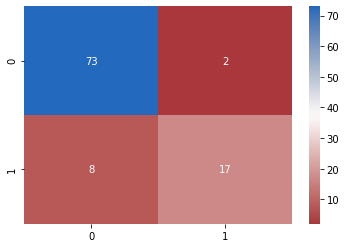

In [116]:
cf_matrix = confusion_matrix(truth_y, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="vlag_r", label = "LogisticRegression") 

LogisticRegression: ROC AUC = 0.962


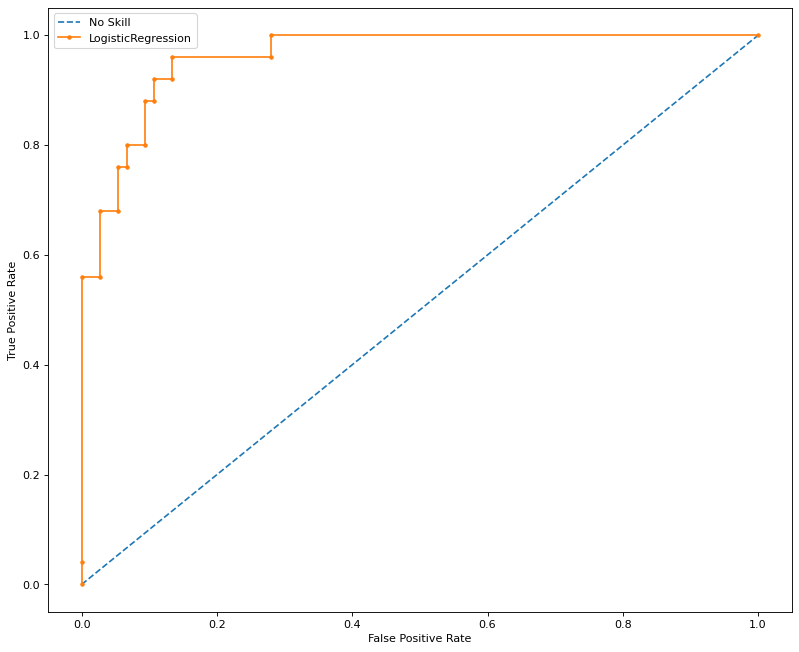

In [120]:
figure(figsize=(12, 10), dpi=80)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(truth_y))]
ns_auc = roc_auc_score(truth_y, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(truth_y, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# predict probabilities
probs = lr.predict_proba(truth_X)
probs = probs[:,1]
# calculate scores
auc = roc_auc_score(truth_y, probs)
# summarize scores
print('LogisticRegression: ROC AUC = %.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(truth_y, probs)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label="LogisticRegression")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()